In [11]:
testStat = 'latency_5m_single_transactions'
#testStat = 'latency_5m_single_transactions.transactions_LOCAL_RPC'


# testalgo = 'hbbft'
testalgo1 = 'hbbft'
testrun1 = 'runUpgrade'
testname1 = 'latency2'

testalgo2 = 'hbbft'
testrun2 = 'runUpgradeFull'
testname2 = testname1  # most of the time we wan't to compare the same tests against each other.



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We use larger plot areas, adjust to your needs.

plt.rcParams["figure.figsize"] = (25, 15)

import seaborn as sns
sns.set(style="darkgrid")


In [13]:

def addCalcedColumns(df):
    df['durationSendToConfirmation'] = df['timeReceipt'] - df['timeSend']

filepath1 = 'data/' + testalgo1 + '/' + testrun1 + '/' + testname1 +  '/' + testStat + '.transactions.csv'
filepath2 = 'data/' + testalgo2 + '/' + testrun2 + '/' + testname2 +  '/' + testStat + '.transactions.csv'

df1 = pd.read_csv(filepath1)
df2 = pd.read_csv(filepath2)

addCalcedColumns(df1)
addCalcedColumns(df2)

df1.head()


,internalTxID,transactionHash,blockNumber,timeSend,timeReceipt,timeConfirmed,durationSendToConfirmation
0,1,0xc97be5fbf96c14faebedc6f41d0b7ad77cd508e93769...,1190,1592070721831,1592070722859,1592070722858,1028
1,2,0xc3c76f06ad55d792c3f75490acd25f19f9274da83d4f...,1193,1592070724081,1592070726509,1592070726509,2428
2,3,0x7449eda6690640063790a7fa78951b5efbc88979677b...,1200,1592070731561,1592070732769,1592070732768,1208
3,4,0x57e0e4020a09467faf94428715623c8ce0474f1ab84a...,1211,1592070741510,1592070743776,1592070743775,2266
4,5,0xa9e44a1f7265ef37df8ad73a0b41ff919b1589c8d21f...,1219,1592070749978,1592070751776,1592070751776,1798


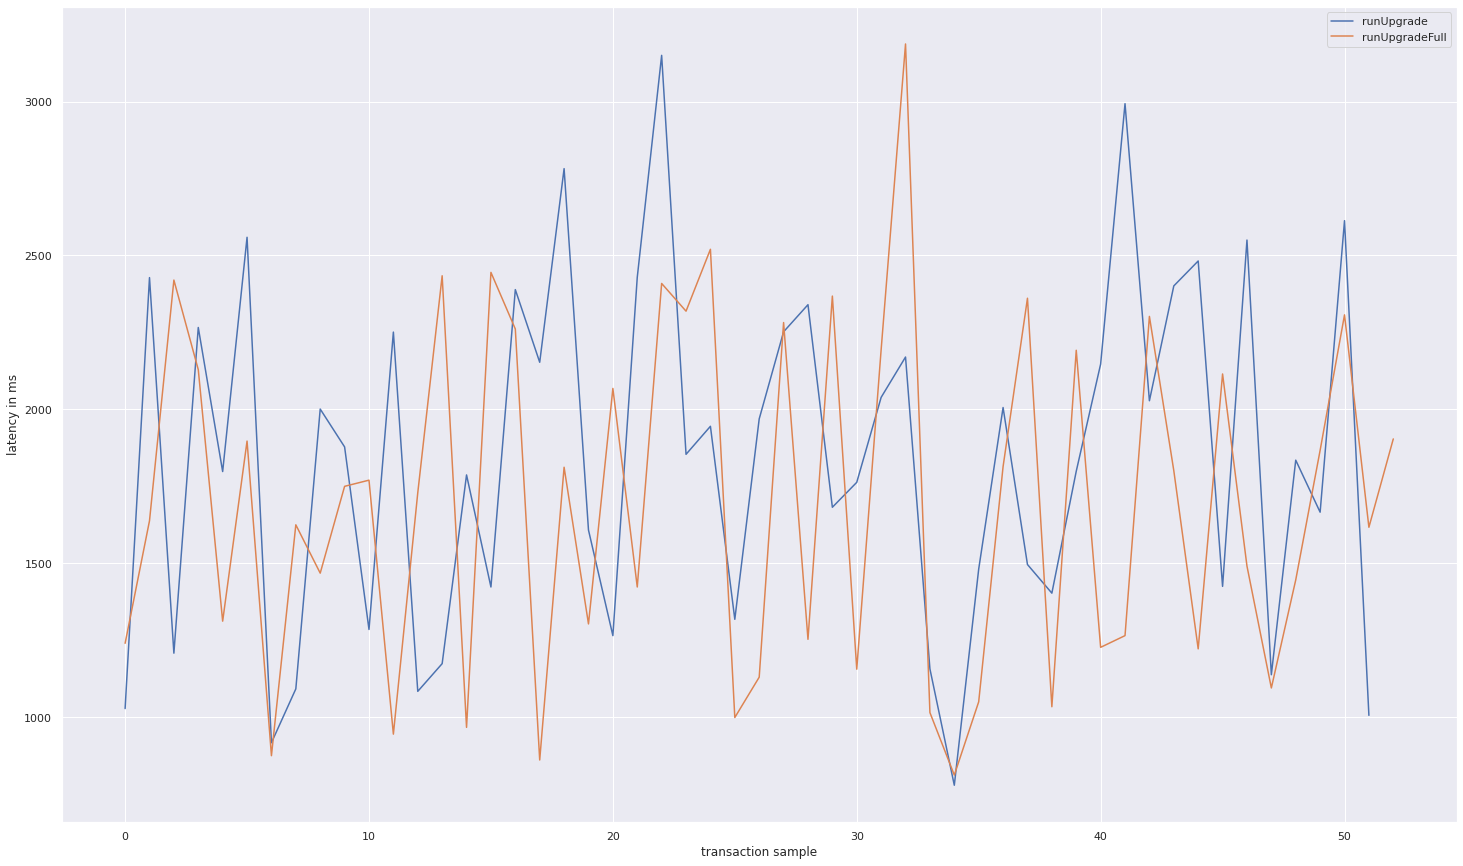

In [14]:
plot = plt.plot(df1.durationSendToConfirmation, label=testrun1)
plot = plt.plot(df2.durationSendToConfirmation, label=testrun2)

plt.xlabel('transaction sample')
plt.ylabel('latency in ms')

plt.legend()


    
#plot = plt.plot(dfAura.durationSendToConfirmation)

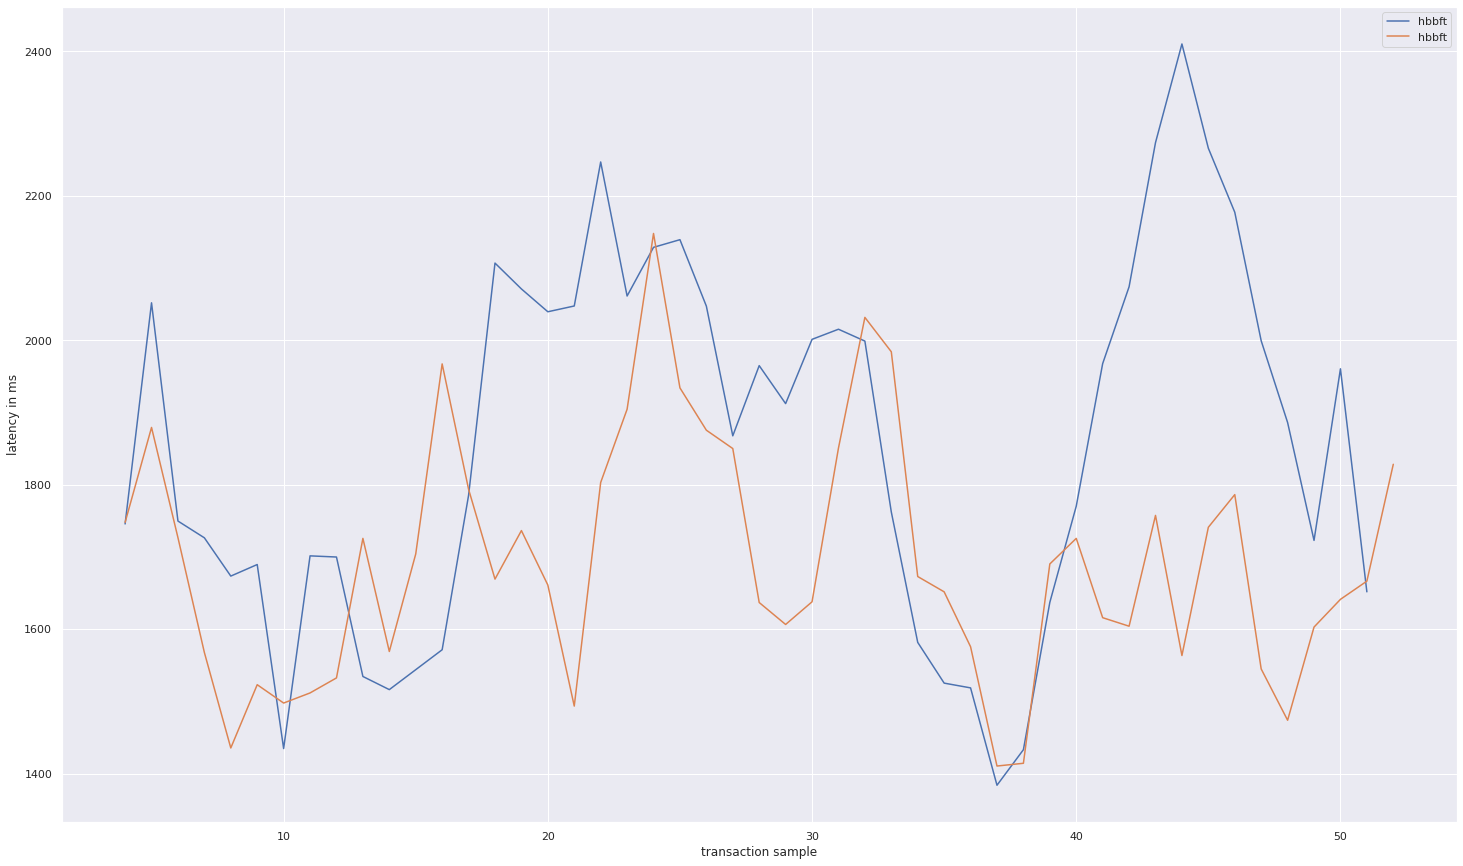

In [15]:
plot = plt.plot(df1.durationSendToConfirmation.rolling(window=5).mean(),  label=testalgo1)
plot = plt.plot(df2.durationSendToConfirmation.rolling(window=5).mean(),  label=testalgo2)
#plot = plt.plot(dfAura.durationSendToConfirmation.rolling(window=5).mean())


plt.xlabel('transaction sample')
plt.ylabel('latency in ms')

plt.legend()

